In [44]:
import keras
from tensorflow.keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Reshape,ZeroPadding2D,AveragePooling2D,Flatten
#from keras.optimizers import SGD
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
from PIL import Image 
%matplotlib inline

In [45]:
np.random.seed(7)

In [46]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_val, y_val = X_train[55000:, ..., np.newaxis], y_train[55000:]
X_train, y_train = X_train[:55000, ..., np.newaxis], y_train[:55000]
X_test =  X_test[..., np.newaxis]

print("Image Shape: {}".format(X_train[0].shape), end = '\n\n')
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set:   {} samples".format(len(X_val)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set:   5000 samples
Test Set:       10000 samples


In [47]:
# Pad images with 0s
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape for: ", end='\n\n')
print("-Training set: {}".format(X_train.shape))
print("-Validation set: {}".format(X_val.shape))
print("-Test set: {}".format(X_test.shape))
#X_test[0]

Updated Image Shape for: 

-Training set: (55000, 32, 32, 1)
-Validation set: (5000, 32, 32, 1)
-Test set: (10000, 32, 32, 1)


In [ ]:
x=1
for i in range(0,32):
  for j in range(0,32):
    if(j==0):
      print("{", end = '')
    if(j<31):  
      print(X_test[x][i][j],",", end = '')
    if(j==31):
      print(X_test[x][i][j],"},") 

In [48]:
# Normalization.
X_train, X_val, X_test = X_train/float(255), X_val/float(255), X_test/float(255)
X_train -= np.mean(X_train)
X_val -= np.mean(X_val)
X_test -= np.mean(X_test)

In [26]:

model = Sequential()

    # C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))

    # P1: (None,28,28,6) -> (None,14,14,6).
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

    # P2: (None,10,10,16) -> (None,5,5,16).
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())

    # FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='tanh'))

    # FC2: (None,120) -> (None,84).
model.add(Dense(84, activation='tanh'))

    # FC3: (None,84) -> (None,10).
model.add(Dense(10, activation='softmax'))

    # Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
    
    

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [27]:
# Compile the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)
# Save the model.
#model.save("lenet5_model.h5")

Epoch 1/20
1719/1719 [==============================] - 37s 21ms/step - loss: 0.5345 - accuracy: 0.8593 - val_loss: 0.1808 - val_accuracy: 0.9518
Epoch 2/20
1719/1719 [==============================] - 35s 21ms/step - loss: 0.1836 - accuracy: 0.9478 - val_loss: 0.1115 - val_accuracy: 0.9704
Epoch 3/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.1247 - accuracy: 0.9644 - val_loss: 0.0876 - val_accuracy: 0.9754
Epoch 4/20
1719/1719 [==============================] - 35s 21ms/step - loss: 0.0974 - accuracy: 0.9722 - val_loss: 0.0753 - val_accuracy: 0.9788
Epoch 5/20
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0812 - accuracy: 0.9763 - val_loss: 0.0665 - val_accuracy: 0.9812
Epoch 6/20
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0709 - accuracy: 0.9792 - val_loss: 0.0600 - val_accuracy: 0.9842
Epoch 7/20
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0629 - accuracy: 0.9815 - val_loss: 0.0579 -

In [ ]:
#model.save("lenet5_model.h5")

Test set error rate: 0.9875

Plot of training error over 20 epochs:


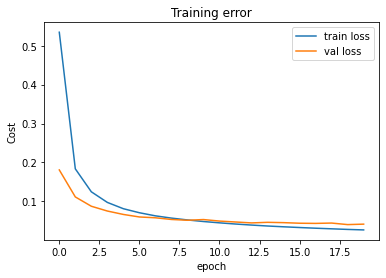

In [43]:
#model = tf.keras.models.load_model('C:\Users\Kin\Desktop\lenet5_model.h5')

# Make prediction.
predictions = model.predict(X_test)

# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred == y_test)))

# Plot training error.
print('\nPlot of training error over 20 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()